# United States - Crime Rates - 1960 - 2014

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mpd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/04_Apply/US_Crime_Rates/US_Crime_Rates_1960_2014.csv). 

### Step 3. Assign it to a variable called crime.

In [15]:
crime = pd.read_csv('US_Crime_Rates_1960_2014.csv')
crime.head()

,Year,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
0,1960,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1,1961,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
2,1962,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
3,1963,188483000,4109500,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
4,1964,191141000,4564600,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 4. What is the type of the columns?

In [16]:
crime.dtypes

Year                  int64
Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

##### Have you noticed that the type of Year is int64. But pandas has a different type to work with Time Series. Let's see it now.

### Step 5. Convert the type of the column Year to datetime64

In [30]:
crime['Year'] = pd.to_datetime(crime['Year'], format='%Y')

### Step 6. Set the Year column as the index of the dataframe

In [32]:
crime.set_index('Year', inplace=True)
crime.head(2)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000


### Step 7. Delete the Total column

In [35]:
# Solution 1
crime.drop(columns='Total', inplace=True)
# Solution 2
#del crime['Total']
crime.head()

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800
1963-01-01,188483000,316970,3792500,8640,17650,116470,174210,1086400,2297800,408300
1964-01-01,191141000,364220,4200400,9360,21420,130390,203050,1213200,2514400,472800


### Step 8. Group the year by decades and sum the values

#### Pay attention to the Population column number, summing this column is a mistake

In [294]:
_={}
for col in crime.columns :
    if col == 'Population':
        _[col]=['mean', 'max']
    else:
        _[col]='sum'
_

{'Population': ['mean', 'max'],
 'Violent': 'sum',
 'Property': 'sum',
 'Murder': 'sum',
 'Forcible_Rape': 'sum',
 'Robbery': 'sum',
 'Aggravated_assault': 'sum',
 'Burglary': 'sum',
 'Larceny_Theft': 'sum',
 'Vehicle_Theft': 'sum'}

In [295]:
# Solution 1
crime_dec = crime.reset_index().groupby(pd.Grouper(key='Year', freq='10Y')).agg(_)
crime_dec.columns = ['__'.join(c).strip() for c in crime_dec.columns.values]
crime_dec

,Population__mean,Population__max,Violent__sum,Property__sum,Murder__sum,Forcible_Rape__sum,Robbery__sum,Aggravated_assault__sum,Burglary__sum,Larceny_Theft__sum,Vehicle_Theft__sum
Year,,,,,,,,,,,
1960-12-31,179323175.0,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1970-12-31,193896529.8,203235298,4585290,49424400,113070,257520,1875530,2339170,14614000,28918100,5892300
1980-12-31,214330726.4,225349264,10213630,96088300,199270,599570,4375000,5039800,30076200,56068900,9943200
1990-12-31,239473067.8,248709873,14549938,117640700,206839,885209,5456539,8001340,32352194,72849053,12439611
2000-12-31,264553729.1,281421906,17132404,116580585,203810,986445,5517676,10425809,25727107,76705256,14148520
2010-12-31,297587743.0,309330219,13793818,99874408,162254,917914,4191439,8522262,21682641,67203302,10992397
2020-12-31,315204022.0,318857056,4820769,34983325,58095,335466,1380720,2982298,7956713,24197097,2829515


In [296]:
# Solution 2
crime_dec = crime.resample('10AS').agg(_)
crime_dec.columns = ['__'.join(c).strip() for c in crime_dec.columns.values]
crime_dec

,Population__mean,Population__max,Violent__sum,Property__sum,Murder__sum,Forcible_Rape__sum,Robbery__sum,Aggravated_assault__sum,Burglary__sum,Larceny_Theft__sum,Vehicle_Theft__sum
Year,,,,,,,,,,,
1960-01-01,191505317.5,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970-01-01,212119329.8,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980-01-01,237137006.9,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990-01-01,261282525.8,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000-01-01,294796911.7,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010-01-01,314029261.4,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


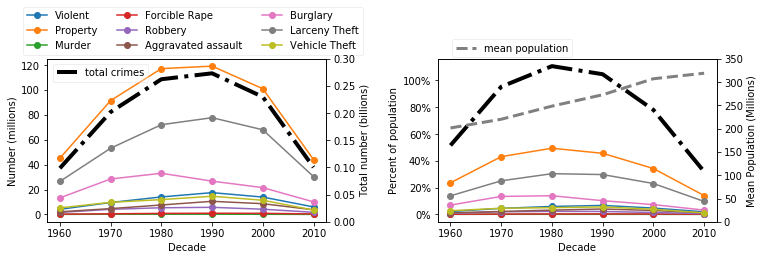

In [309]:
import matplotlib.ticker as mtick

fig, axs = plt.subplots(1,2)
fig.patch.set_facecolor('white')
fig.set_size_inches(12,3)
fig.subplots_adjust(wspace=0.4)

for i in crime_dec.columns[2:]:
    axs[0].plot(crime_dec.index, crime_dec.loc[:,i]/1E6,\
                'o-', label=i.strip('__sum').replace('_', ' '))
ax0bis = axs[0].twinx()
ax0bis.plot(crime_dec.index, crime_dec.iloc[:,2:].agg(sum, axis=1)/1E9, \
            '-.',color='k',lw=4, label='total crimes')
axs[0].set_xlabel("Decade"), axs[0].set_ylabel("Number (millions)")
ax0bis.set_ylabel("Total number (billions)")
axs[0].legend(ncol=3, bbox_to_anchor=(1.15,1.35)).get_frame().set_alpha(0.3)
ax0bis.legend(ncol=1, bbox_to_anchor=(0.38,1)).get_frame().set_alpha(0.3)
ax0bis.set(ylim=(0,0.3))

for i in crime_dec.columns[2:]:
    axs[1].plot(crime_dec.index, crime_dec.loc[:,i].div(crime_dec.iloc[:,0])*100,\
                'o-', label=i.strip('__sum').replace('_', ' '))
axs[1].plot(crime_dec.index, crime_dec.iloc[:,2:].apply(lambda x: x*100/crime_dec.iloc[:,0]).agg(sum,axis=1), \
            '-.',color='k',lw=4, label='total crimes')
ax1bis = axs[1].twinx()
ax1bis.plot(crime_dec.index, crime_dec.iloc[:,1]/1E6, \
            '--',color='grey',lw=3, label='mean population')
ax1bis.legend(ncol=1, bbox_to_anchor=(0.5,1.15)).get_frame().set_alpha(0.3)
ax1bis.set_ylabel('Mean Population (Millions)')
ax1bis.set(ylim=(0,350))

axs[1].set_xlabel("Decade"), axs[1].set_ylabel("Percent of population")
axs[1].yaxis.set_major_formatter(mtick.PercentFormatter())


### Step 9. What is the most dangerous decade to live in the US?

In [310]:
sum_dec = crime_dec.iloc[:,2:].agg(sum, axis=1)
print(sum_dec.idxmax(),sum_dec.max())
sum_dec

1990-01-01 00:00:00 273162730


Year
1960-01-01     98591660
1970-01-01    201983370
1980-01-01    262246703
1990-01-01    273162730
2000-01-01    229828783
2010-01-01    100271792
Freq: 10AS-JAN, dtype: int64

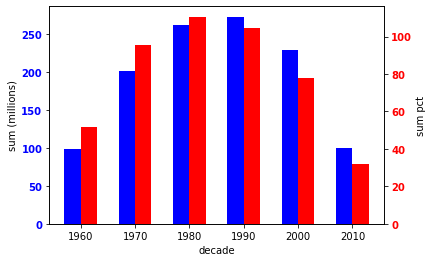

In [311]:
xlab = [d.year for d in sum_dec.index.to_pydatetime()]
x = np.arange(len(xlab))
y = sum_dec.values/1E6
ypct = crime_dec.iloc[:,2:].apply(lambda x: x*100/crime_dec.iloc[:,0]).agg(sum,axis=1)

fig, ax1 = plt.subplots(1)
ax1.bar(x-0.15, y, width=0.3, color='b')
ax2 = ax1.twinx()
ax2.bar(x+0.15, ypct, width=0.3, color='r')
plt.gcf().patch.set_facecolor('white')

ax1.set_xlabel('decade')
ax1.set_ylabel('sum (millions)')
ax2.set_ylabel('sum pct')

# ax.set_xticklabels([x.year for x in sum_dec.index.to_pydatetime()])
ax1.xaxis.set_tick_params(rotation=0)
for t in ax1.yaxis.get_ticklabels():
    t.set_color('b'), t.set_fontweight('bold')
for t in ax2.yaxis.get_ticklabels():
    t.set_color('r'), t.set_fontweight('bold')
ax2.set_xticklabels(['phantom']+xlab)
plt.show()